In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression Task

In [19]:
def MSE(y, y_hat):
   return np.square(np.subtract(y,y_hat)).mean()
def Log(y, y_hat):
    return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def dEdW_1 (y, y_hat,x_1):
   return np.sum(-(y - y_hat) * x_1)
def dEdW_0 (y, y_hat):
   return np.sum(-(y - y_hat))
def Linear(Z):
    return Z

In [20]:
N = 200
slope = 3
mu, sigma = 0, 0.1 # mean and standard deviation
intercept = np.random.normal(mu, sigma, N)
x_1 = np.random.rand(N)
y = slope*x_1 + intercept

In [22]:
def regression(x_1, y, loss = 'MSE'):
    w_1 = np.random.uniform(-2,-3,1)
    w_0 = np.random.uniform(0,2,1)
    x_0 = 1
    y_hat = w_1*x_1 + w_0*x_0
    epoch = 50
    eta = 0.005
    E = []
    for ep in range(epoch):
        Z = w_1 * x_1 + w_0*x_0
        y_hat = Linear(Z)
        if loss == 'MSE':
            error = MSE(y, y_hat)
        elif loss == 'Log':
            error = Log(y, y_hat)
        E.append(error)
        dEdw_1 = dEdW_1(y, y_hat, x_1)
        dEdw_0 = dEdW_0(y, y_hat)
        w_1 = w_1 - eta*dEdw_1
        w_0 = w_0 - eta*dEdw_0
        if ep % 10 == 0:
           plt.scatter(x_1, y, s=np.pi*10, c='r', alpha=0.5)
           plt.plot(x_1, y_hat, '-b', label="%s= %.2f" %(loss,error) + '\n' + "Epoch Number= %d" %(ep))
           plt.xlabel('x (Our Data)')
           plt.ylabel('y_hat (Network Outputs)')
           plt.legend()
           plt.ylim(-3, 5)
           plt.grid()
           plt.show()
    
    plt.plot(E, 'r')
    plt.grid()
    plt.title("Error")
    plt.xlabel("Epochs")
    plt.ylabel("%s" %loss)
    plt.show()

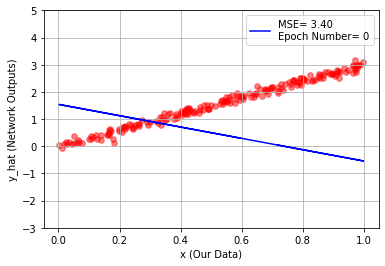

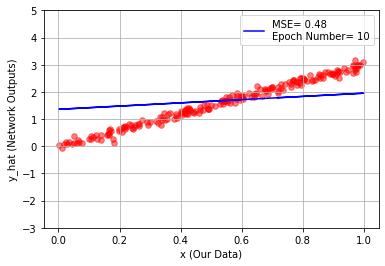

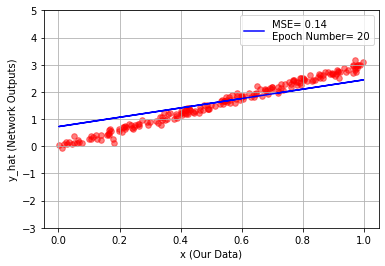

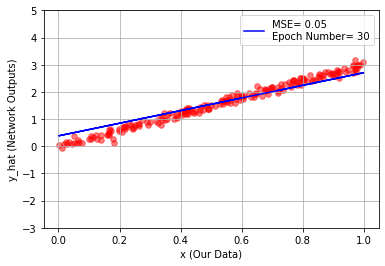

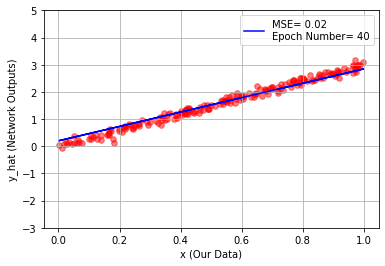

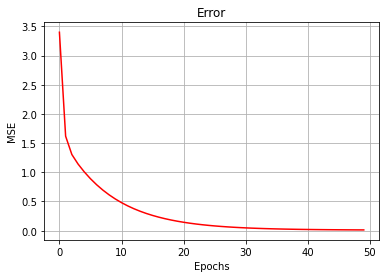

In [25]:
regression(x_1, y, loss = 'MSE')

<ipython-input-19-8a2df44e2b5c>:4: RuntimeWarning: invalid value encountered in log
  return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))


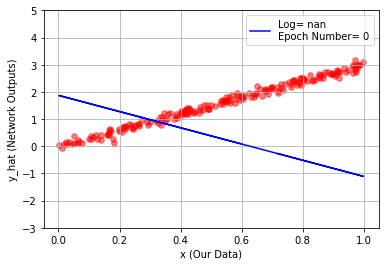

<ipython-input-19-8a2df44e2b5c>:4: RuntimeWarning: invalid value encountered in log
  return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))


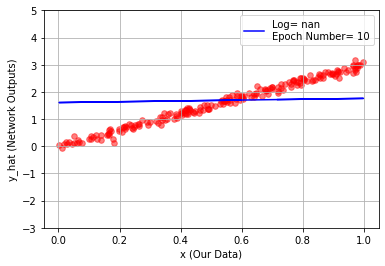

<ipython-input-19-8a2df44e2b5c>:4: RuntimeWarning: invalid value encountered in log
  return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))


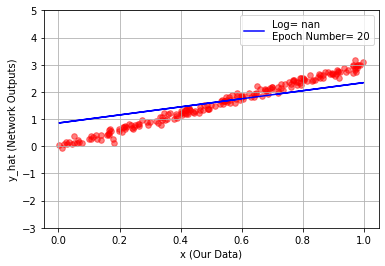

<ipython-input-19-8a2df44e2b5c>:4: RuntimeWarning: invalid value encountered in log
  return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))


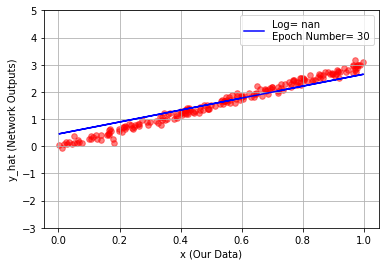

<ipython-input-19-8a2df44e2b5c>:4: RuntimeWarning: invalid value encountered in log
  return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))


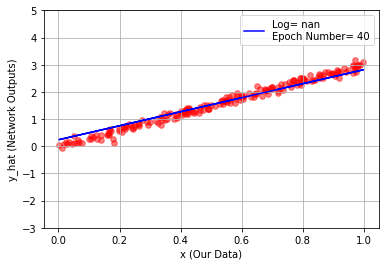

<ipython-input-19-8a2df44e2b5c>:4: RuntimeWarning: invalid value encountered in log
  return -1 * np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))


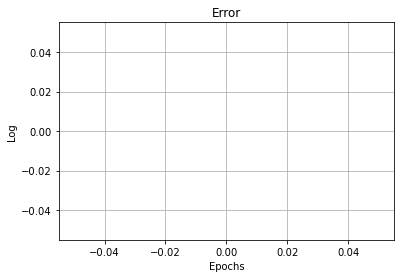

In [26]:
regression(x_1, y, loss = 'Log')

## Logistic Regression Task

In [27]:
# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

In [28]:
# Define input
x = np.random.uniform(0,1,(2,1))
y = 0

print('X:', x,"\n", "y:", y)

X: [[0.33606594]
 [0.54546228]] 
 y: 0


In [29]:
# Define initial parameters
W1 = np.random.rand(1,2)
b1 = np.random.rand(1,1)

print("Initial parameters:")
print("W1", W1)
print("b1", b1)

Initial parameters:
W1 [[0.98607333 0.84138238]]
b1 [[0.71839335]]


In [30]:
# Fwd Pass
z1 = np.dot(W1, x) + b1
a1 = sigmoid(z1)

# Initial output
print("Prediction:", a1, "Actual:", y)

Prediction: [[0.81887163]] Actual: 0


In [31]:
loss = 'mse' # 'log'
# Backward pass
# Compute gradients
if loss == 'mse':
    dz1 = np.square(np.subtract(y,a1)).mean()
elif loss == 'log':
    dz1 = -1 * np.mean(y * np.log(a1) + (1 - y) * np.log(1-a1))
db1 = dz1
dW1 = np.dot(dz1, a1.T)

# Update weights
W1 = W1 - dW1
b1 = b1 - db1

In [32]:
# Fwd Pass with new weights
z1New = np.dot(W1, x) + b1
a1New = sigmoid(z1New)

print("Initial Prediction", a1, "New Prediction:", a1New, "Actual:", y)

Initial Prediction [[0.81887163]] New Prediction: [[0.58761822]] Actual: 0


In [36]:
# Backprop
def backprop(W1, b1, loss):
    for i in range(25):
        if loss == 'mse':
            dz1 = np.square(np.subtract(y,a1)).mean()
        elif loss == 'log':
            dz1 = -1 * np.mean(y * np.log(a1) + (1 - y) * np.log(1-a1))

        dW1 = np.dot(dz1, a1.T)
        db1 = dz1
    
        W1 = W1 - dW1
        b1 = b1 - db1
        z1New = np.dot(W1, x) + b1
        a1New = sigmoid(z1New)
        
        print("epoch: %d" %i, "New prediction: %f" %a1New, "old prediction: %f" %a1)

In [37]:
backprop(W1, b1, loss = 'mse')

epoch: 0 New prediction: 0.309926 old prediction: 0.818872
epoch: 1 New prediction: 0.124003 old prediction: 0.818872
epoch: 2 New prediction: 0.042711 old prediction: 0.818872
epoch: 3 New prediction: 0.013867 old prediction: 0.818872
epoch: 4 New prediction: 0.004413 old prediction: 0.818872
epoch: 5 New prediction: 0.001395 old prediction: 0.818872
epoch: 6 New prediction: 0.000440 old prediction: 0.818872
epoch: 7 New prediction: 0.000139 old prediction: 0.818872
epoch: 8 New prediction: 0.000044 old prediction: 0.818872
epoch: 9 New prediction: 0.000014 old prediction: 0.818872
epoch: 10 New prediction: 0.000004 old prediction: 0.818872
epoch: 11 New prediction: 0.000001 old prediction: 0.818872
epoch: 12 New prediction: 0.000000 old prediction: 0.818872
epoch: 13 New prediction: 0.000000 old prediction: 0.818872
epoch: 14 New prediction: 0.000000 old prediction: 0.818872
epoch: 15 New prediction: 0.000000 old prediction: 0.818872
epoch: 16 New prediction: 0.000000 old prediction:

In [38]:
backprop(W1, b1, loss = 'log')

epoch: 0 New prediction: 0.069931 old prediction: 0.818872
epoch: 1 New prediction: 0.003952 old prediction: 0.818872
epoch: 2 New prediction: 0.000209 old prediction: 0.818872
epoch: 3 New prediction: 0.000011 old prediction: 0.818872
epoch: 4 New prediction: 0.000001 old prediction: 0.818872
epoch: 5 New prediction: 0.000000 old prediction: 0.818872
epoch: 6 New prediction: 0.000000 old prediction: 0.818872
epoch: 7 New prediction: 0.000000 old prediction: 0.818872
epoch: 8 New prediction: 0.000000 old prediction: 0.818872
epoch: 9 New prediction: 0.000000 old prediction: 0.818872
epoch: 10 New prediction: 0.000000 old prediction: 0.818872
epoch: 11 New prediction: 0.000000 old prediction: 0.818872
epoch: 12 New prediction: 0.000000 old prediction: 0.818872
epoch: 13 New prediction: 0.000000 old prediction: 0.818872
epoch: 14 New prediction: 0.000000 old prediction: 0.818872
epoch: 15 New prediction: 0.000000 old prediction: 0.818872
epoch: 16 New prediction: 0.000000 old prediction:

## Explanation and answer to the questions

### Question
Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural
network with backpropagation for regression using the Mean Square Error loss. Assume that you
are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different
from the update rule for the network trained for binary classification using log loss.

### Answer

A 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation was designed for both linear and logistic regression tasks. 

1. For the linear regression task, y is a continuous value. Therefore, when applied log loss, the loss goes to negative infinity and leave us with exploding gradient descent. Therefore, mean square error loss fucntion was the choice of loss fuction for linear regression problem. Moreover, a linear activation function worked for this task but a sigmoid activation function introduced non-linearity which failed to converge.
2. For the logistic regression task, y is a descrete value. There we used sigmoid activation function in the hidden layer and it converged well. The difference of MSE and Log loss can be visualized from the model output.MSE was slow to converge. It took MSE 12 epochs to obtain the lowest loss and 5 epochs for log loss to converge to the minimum.

The takeaway is to apply log loss for binary classification, which also converges faster for binary task. However, to use MSE for linear regression task.
